The dataset consists of 3 variables:
    
|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`date`| date of the poll
|`approval`| President's Trump approval rating
|`disapproval`| President's Trump disapproval rating



##  Persident's Trump daily approval ratings graph.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

rating=pd.read_csv('TrumpRatings.csv')
mydata=rating.copy()

mydata.tail()


,date,approve,disapprove
1315,9/17/20,41.000000,53.500000
1316,9/18/20,46.000000,49.000000
1317,9/19/20,44.000000,52.000000
1318,9/20/20,40.750000,55.250000
1319,9/22/20,44.666667,49.666667


In [2]:
mydata['date']=pd.to_datetime(mydata['date'])
mydata['year']=mydata['date'].dt.year
annual_approval=mydata.groupby('year').agg({'approve':'mean'})
app2017=annual_approval.loc[2017,'approve']
app2018=annual_approval.loc[2018,'approve']
app2019=annual_approval.loc[2019,'approve']
app2020=annual_approval.loc[2020,'approve']



In [3]:
annual_approval

,approve
year,
2017,39.130631
2018,40.855546
2019,41.092979
2020,41.903386


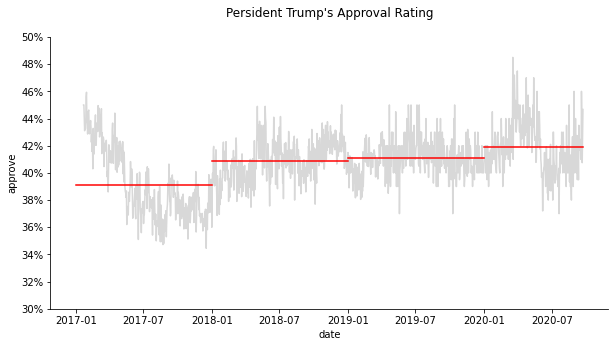

In [4]:
plt.figure(figsize=(10,5))
sns.lineplot(data=mydata, x='date', y='approve',color='grey',alpha=0.3)
plt.title("Persident Trump's Approval Rating",
         loc='center',
         color = 'black',
         pad = 20,
         fontsize=12)
plt.xlabel('date', fontsize=10)
plt.ylabel('approve', fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(30, 50)
ytickpositions = list(range(30,52,2))
yticklabels = [str(i)+'%' for i in range(30,52,2)]
plt.yticks(ytickpositions,yticklabels)
plt.plot(pd.to_datetime(['2017-01-01','2018-01-01']),[app2017,app2017],color='red')
plt.plot(pd.to_datetime(['2018-01-01','2019-01-01']),[app2018,app2018],color='red')
plt.plot(pd.to_datetime(['2019-01-01','2020-01-01']),[app2019,app2019],color='red')
plt.plot(pd.to_datetime(['2020-01-01','2020-09-22']),[app2020,app2020],color='red')


## the average monthy difference between Persident's Trump approval and disapproval ratings Graph since 2017.




In [5]:
mydata=mydata.assign(difference=mydata['disapprove']-mydata['approve'])

In [6]:

mydata['month']=mydata['date'].dt.month
difference_avg=mydata.groupby(['year','month']).agg({'difference':'mean'}).reset_index().set_index('year')

In [7]:
max_value=difference_avg['difference'].max()
min_value=difference_avg['difference'].min()
print(max_value,min_value)

20.614032258387095 2.2399999990000006


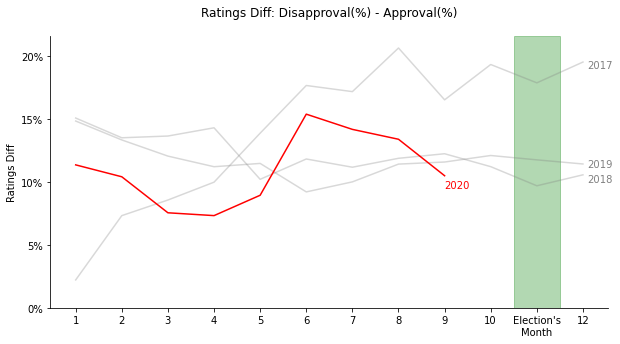

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data=difference_avg.loc[2017,],x='month',y='difference',color='grey',alpha=0.3)
sns.lineplot(data=difference_avg.loc[2018,],x='month',y='difference',color='grey',alpha=0.3)
sns.lineplot(data=difference_avg.loc[2019,],x='month',y='difference',color='grey',alpha=0.3)
sns.lineplot(data=difference_avg.loc[2020,],x='month',y='difference',color='red')
plt.title("Ratings Diff: Disapproval(%) - Approval(%)",
         color = 'black',
         pad = 20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Ratings Diff', fontsize=10)
plt.xlabel('', fontsize=10)
xtickpositions = list(range(1,13))
xticklabels = list(range(1,11))+["Election's\nMonth", 12]
plt.xticks(xtickpositions,xticklabels)
ytickpositions = list(range(0,25,5))
yticklabels = ['0%','5%','10%','15%','20%']
plt.yticks(ytickpositions,yticklabels)
plt.annotate('2017',(12.1,19),fontsize=10, color='grey')
plt.annotate('2018',(12.1,10),fontsize=10, color='grey')
plt.annotate('2019',(12.1,11.2),fontsize=10, color='grey')
plt.annotate('2020',(9,9.5),fontsize=10, color='red')
plt.axvspan(10.5,11.5, color='green', alpha=0.3)